# Vacant Lots as Sites for Insurgent Strategies Toward Healing

##   Group: LandAccess4All
Lupe Rentreria Salome and Mel Liu

### How did both of us decide to map land in Los Angeles?

In 222A Histories and Theories of Planning, we learned about how research is often used to answer questions we already know the answers to. What both of us don't know the answer to is what are the possibilities for taking land back admidst housing shortages and privitazion, as well as goverment misuse of public lands. How could land exist outside colonial frameworks?

Urban planning is results from contestation of spaces and visions. Despite contenstation, how might be be able to hold space for collaoration and community? How many and what types of vacant lots exists?

We hope that making a map of vacant land parcels available to community members who are building people power through land trusts, and seeking rematriation efforts, can benefit from this information.

## Our Data

### [Vacant Parcels from the County Assessor](https://data.lacounty.gov/Parcel-/Vacant-Parcels-LA-County-from-ASR-Use-Code/vcaw-zeg9)

"Valuation and property description for parcels on the Assessor's annual secured assessment roll for 2015."

*The file was close to 75 mb, I reduced down to 39 mb by deleting empty or redundant columns first. I will refer to the above link for the metadata on the meaning of the other columns.

### [Vacant Land Data: Community Boundaries](https://data.lacounty.gov/GIS-Data/Community-Boundaries-CSA-/g4rb-en2z)

Communities are one of the most complex geographic issues in the County of Los Angeles, due to historical narratives, perceptions of value, intense public interest, and shifts over time. The County has a need to establish a consistent geographic reporting base that will enable statistics and information to reported to the Board, that attempts to represent all of the interactions but is primarily focused on reporting.

In [1]:
# libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from sodapy import Socrata

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# api url for vacant lots
vac_url = 'https://data.lacounty.gov/resource/vcaw-zeg9.json'

# call the api and bring the data in
with urllib.request.urlopen(vac_url) as url:
    vacdata = json.loads(url.read().decode())

# convert the data to a dataframe
vacdf = pd.json_normalize(vacdata)

In [3]:
vacdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   usecodedescchar1             1000 non-null   object
 1   roll_homeownersexemp         1000 non-null   object
 2   situsunit                    1000 non-null   object
 3   recordingdate                1000 non-null   object
 4   effectiveyearbuilt           1000 non-null   object
 5   :@computed_region_gj26_y8x3  1000 non-null   object
 6   istaxableparcel              1000 non-null   object
 7   roll_totlandimp              1000 non-null   object
 8   roll_perspropexemp           1000 non-null   object
 9   parcelboundarydescription    1000 non-null   object
 10  roll_landbaseyear            1000 non-null   object
 11  situscity                    1000 non-null   object
 12  roll_impbaseyear             1000 non-null   object
 13  usetype                      1000 

In [4]:
# convert df to gdf for vacant parcels
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
vacgdf = gpd.GeoDataFrame(vacdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(vacdf.center_lon, vacdf.center_lat))

In [5]:
# output the data's projection
vacgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Mapping the Data
### adding a basemap

In [6]:
# reproject to web mercator
vacgdf_web_mercator = vacgdf.to_crs(epsg=3857)

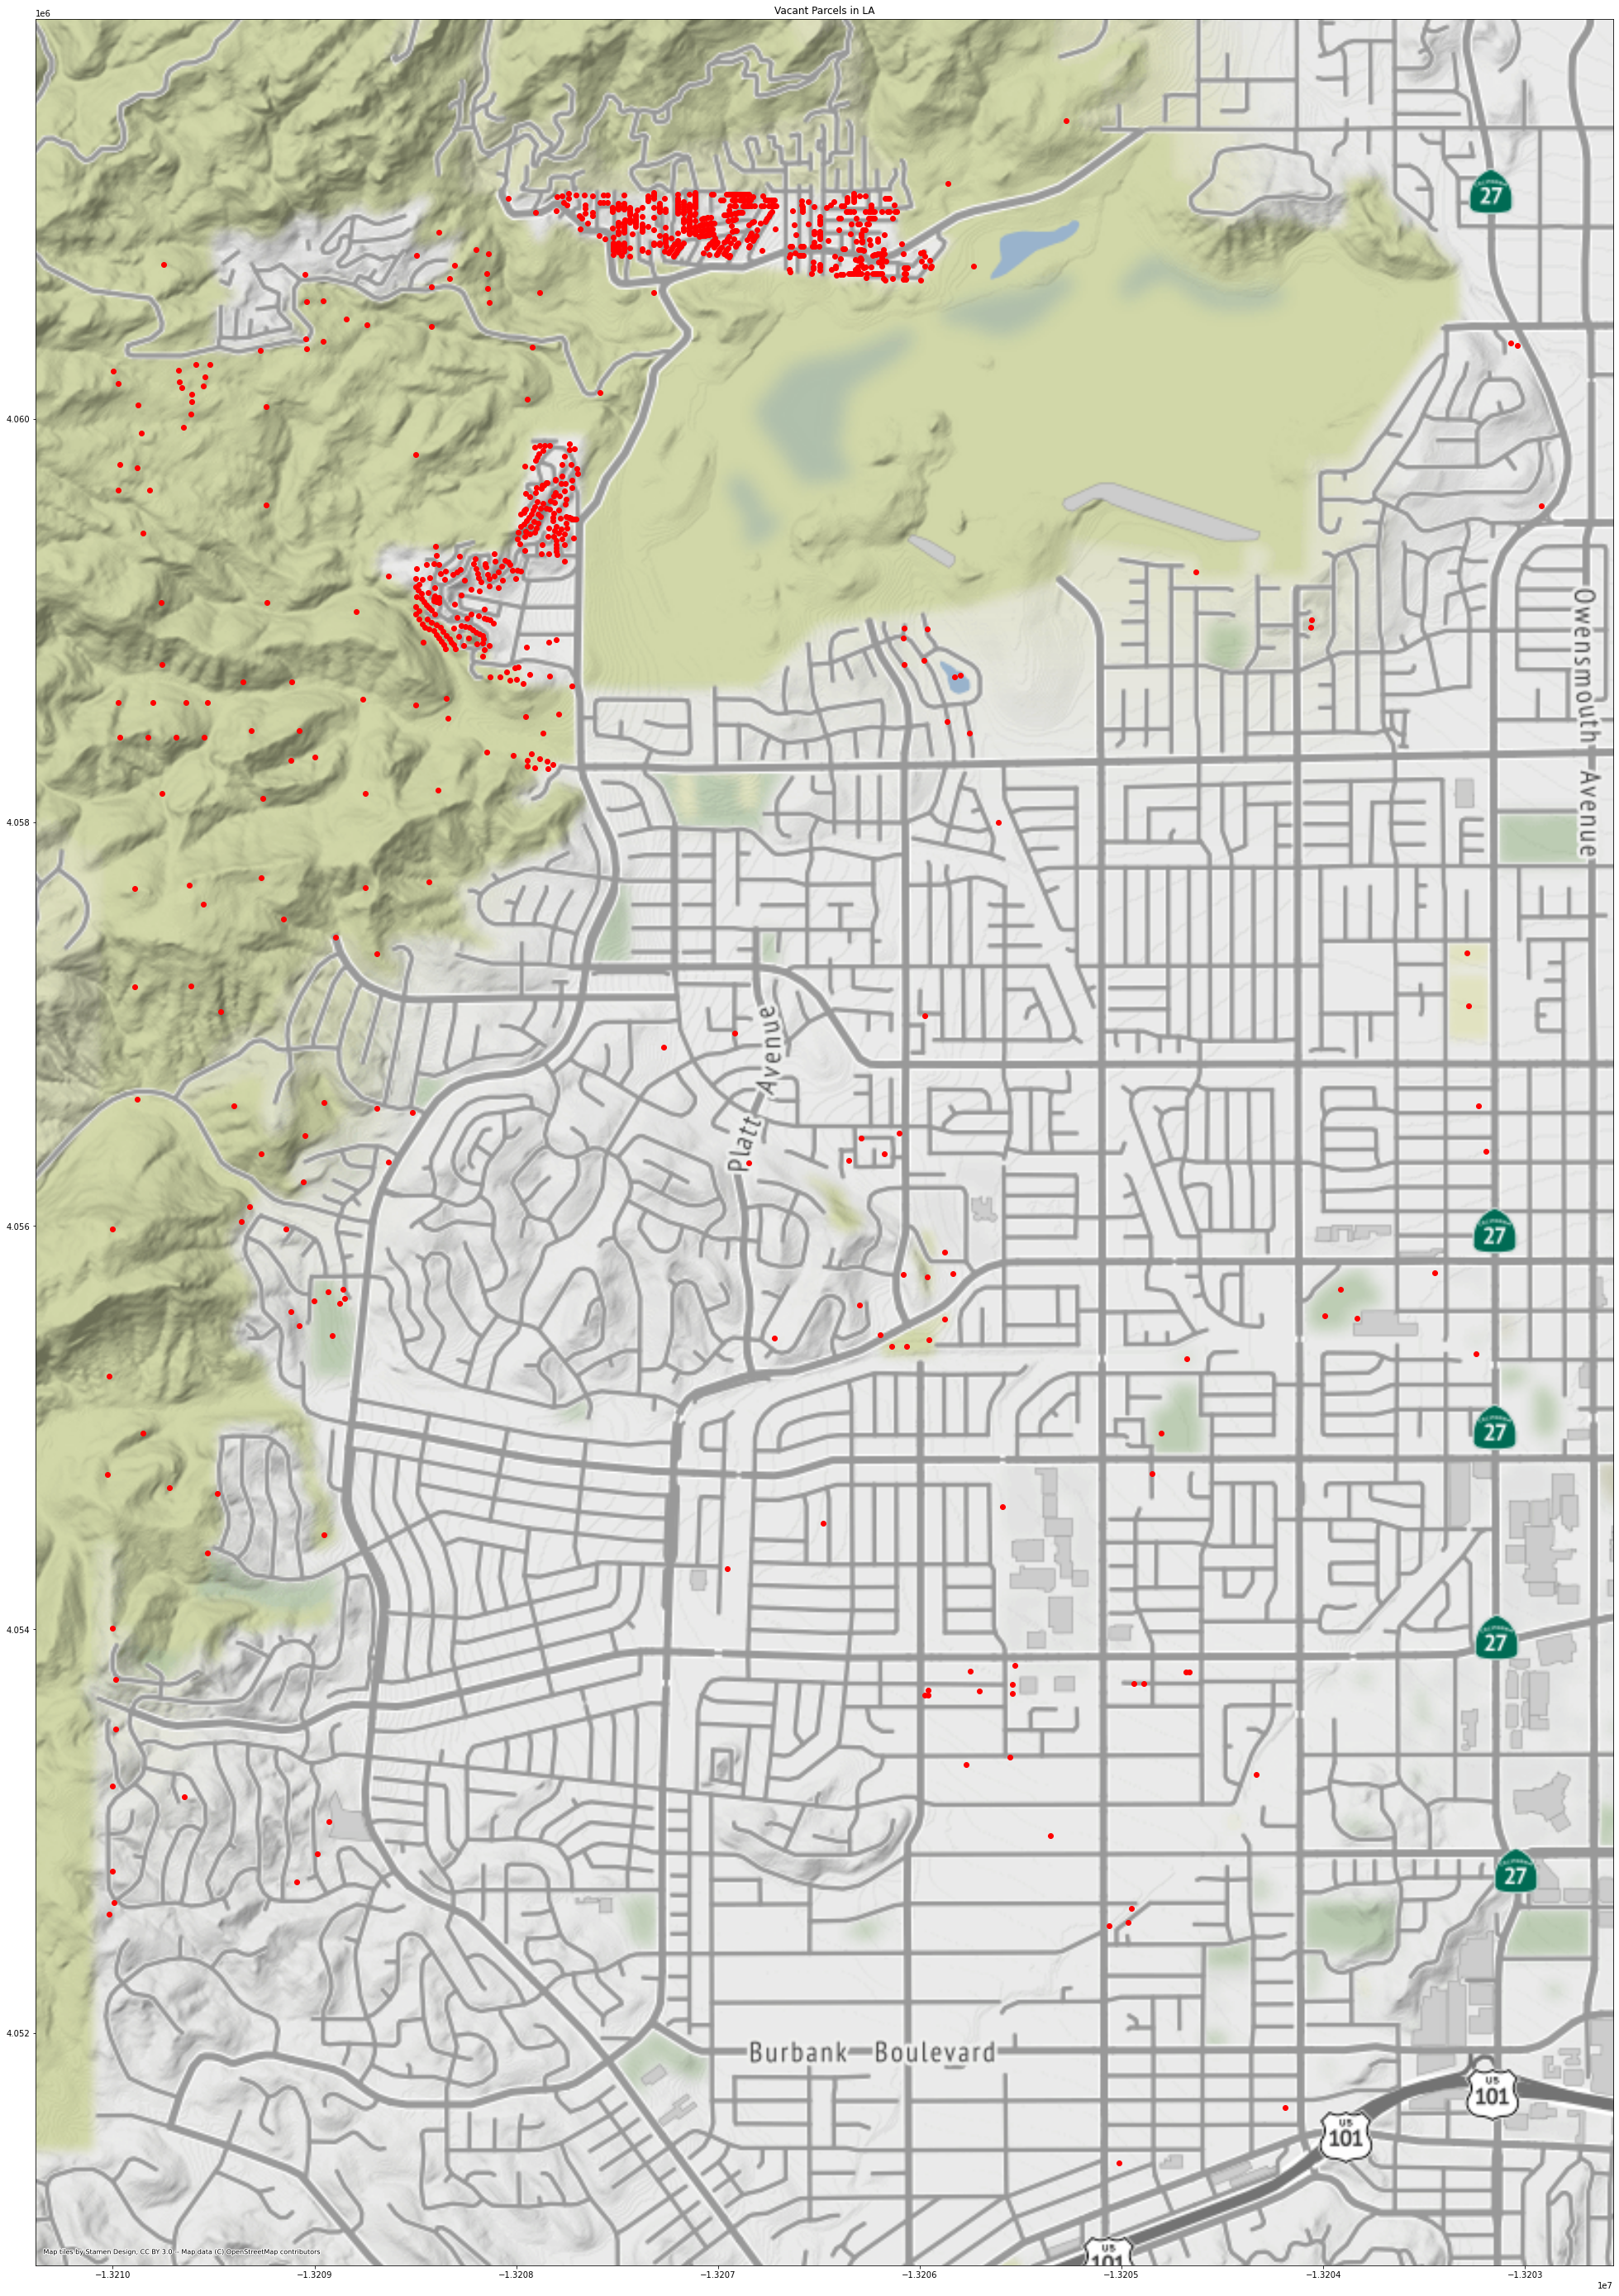

In [7]:
# map the vacant parcels
fig, ax = plt.subplots(figsize=(50,50))

vacgdf_web_mercator.plot(ax=ax,
                      color='red')

ax.axis('on')

ax.set_title('Vacant Parcels in LA')

ctx.add_basemap(ax)

### seems like the map is ina focused community. After googling the streets, we found out it was by Thousand Oaks Valley. We are wondering if we can shift the center. 
Now, we are going to import the community baundaries set and merge both.

In [8]:
#Time to import the community boundaries data set

comgdf = gpd.read_file("Community Boundaries (CSA) (1).geojson")

In [9]:
type (comgdf)

geopandas.geodataframe.GeoDataFrame

In [10]:
comgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   community       261 non-null    object  
 1   source          348 non-null    object  
 2   label           348 non-null    object  
 3   city_type       348 non-null    object  
 4   objectid        348 non-null    object  
 5   lcity           348 non-null    object  
 6   shape_stlength  348 non-null    object  
 7   shape_starea    348 non-null    object  
 8   geometry        348 non-null    geometry
dtypes: geometry(1), object(8)
memory usage: 24.6+ KB


In [11]:
list(comgdf)

['community',
 'source',
 'label',
 'city_type',
 'objectid',
 'lcity',
 'shape_stlength',
 'shape_starea',
 'geometry']

<AxesSubplot:>

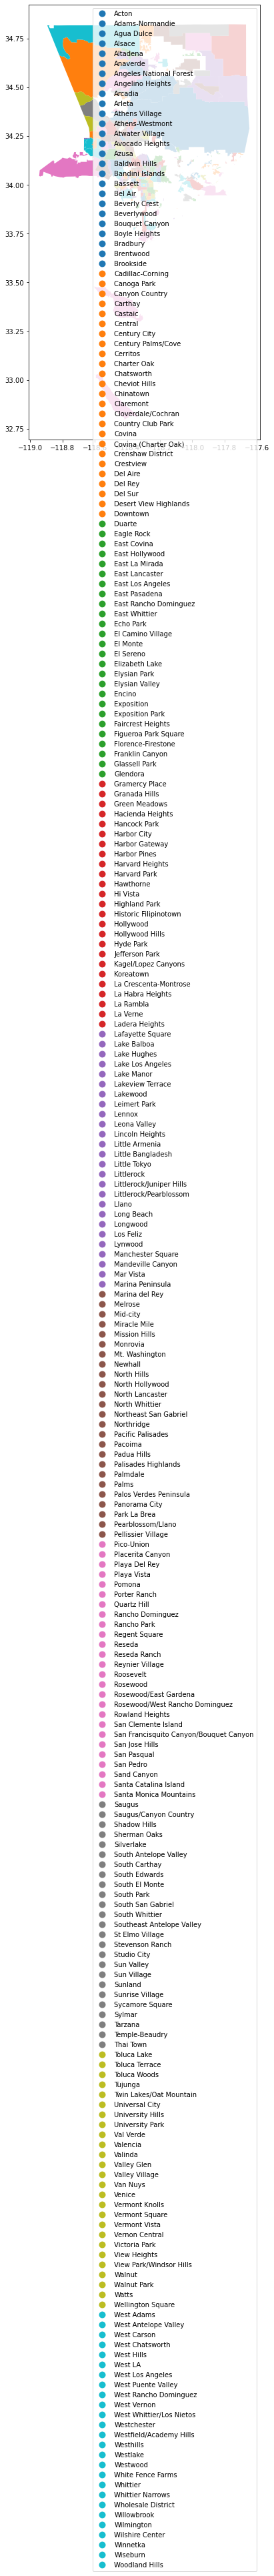

In [12]:
#let's map the community boundaries geodataframe

comgdf.plot(figsize=(12,12),
                          column='community',
                          legend=True)

### Adding Basemap 
We mapped the community boundaries and vacant lot parcels at large.

In [13]:
# now let's project to web mercator 
comgdf_wm = comgdf.to_crs(epsg=3857)

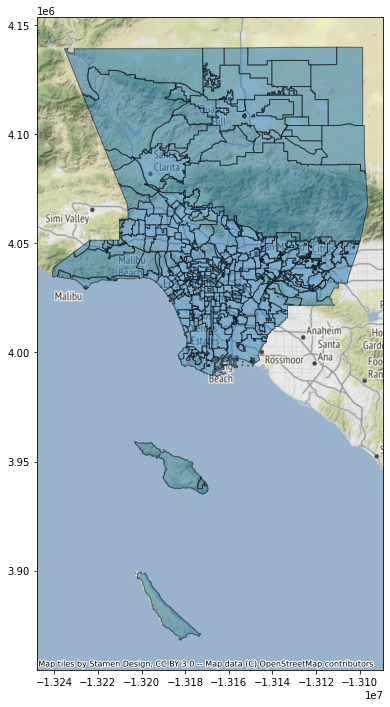

In [14]:
# Great, looks like it's all set

ax = comgdf_wm.plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax) 

Yay! it is a very zoomed out map, but it is the first time we do it! 

In [15]:
# conduct a spatial join (i.e. assign each arrest to the neighborhood it is in)
vac_by_com = gpd.sjoin(comgdf, vacgdf) #Spatial join Points to polygons
vac_by_com

community   source                      label city_type objectid  \
85   Canoga Park  LA City  Los Angeles - Canoga Park      City       61   
85   Canoga Park  LA City  Los Angeles - Canoga Park      City       61   
85   Canoga Park  LA City  Los Angeles - Canoga Park      City       61   
85   Canoga Park  LA City  Los Angeles - Canoga Park      City       61   
85   Canoga Park  LA City  Los Angeles - Canoga Park      City       61   
..           ...      ...                        ...       ...      ...   
346   West Hills  LA City   Los Angeles - West Hills      City      174   
346   West Hills  LA City   Los Angeles - West Hills      City      174   
346   West Hills  LA City   Los Angeles - West Hills      City      174   
346   West Hills  LA City   Los Angeles - West Hills      City      174   
346   West Hills  LA City   Los Angeles - West Hills      City      174   

           lcity      shape_stlength        shape_starea  \
85   Los Angeles  57957.649654091998  128293030.19238281   
85   Los Angeles  57957.649654091998  128293030.19238281   
85   Los Angeles  57957.649654091998  128293030.19238281   
85   Los Angeles  57957.649654091998  128293030.19238281   
85   Los Angeles  57957.649654091998  128293030.19238281   
..           ...                 ...                 ...   
346  Los Angeles  105989.43541216178  278714351.12011719   
346  Los Angeles  105989.43541216178  278714351.12011719   
346  Los Angeles  105989.43541216178  278714351.12011719   
346  Los Angeles  105989.43541216178  278714351.12011719   
346  Los Angeles  105989.43541216178  278714351.12011719   

                                              geometry  index_right  ...  \
85   MULTIPOLYGON (((-118.59255 34.23546, -118.5924...          916  ...   
85   MULTIPOLYGON (((-118.59255 34.23546, -118.5924...          919  ...   
85   MULTIPOLYGON (((-118.59255 34.23546, -118.5924...          920  ...   
85   MULTIPOLYGON (((-118.59255 34.23546, -118.5924...          918  ...   
85   MULTIPOLYGON (((-118.59255 34.23546, -118.5924...          917  ...   
..                                                 ...          ...  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          556  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          554  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          558  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...          656  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...           14  ...   

    situsdirection roll_realestateexemp   center_lat    situszip yearbuilt  \
85                                    0  34.19759028                     0   
85                                    0  34.19889880                     0   
85                                    0  34.19900097                     0   
85                                    0  34.19997855                     0   
85                                    0  34.20058374  91303-1136         0   
..             ...                  ...          ...         ...       ...   
346                                   0  34.23104921                     0   
346                                   0  34.23111308                     0   
346                                   0  34.23104672                     0   
346                                   0  34.23299360                     0   
346                                   0  34.23666915                     0   

    location_1.latitude location_1.needs_recoding location_1.longitude  \
85          34.19759028                     False        -118.60674292   
85           34.1988988                     False        -118.61205388   
85          34.19900097                     False        -118.61349666   
85          34.19997855                     False        -118.61279891   
85          34.20058374                     False        -118.60858656   
..                  ...                       ...                  ...   
346         34.23

We are also reminded that we are limited in data. 

In [16]:
vac_count = vac_by_com.value_counts('community').reset_index(name='vac_count')
vac_count

community  vac_count
0       Lake Manor        560
1       West Hills        336
2  West Chatsworth         64
3   Woodland Hills         25
4      Canoga Park          9
5        Westhills          5
6       Chatsworth          1

In [17]:
# add the count to the neighborhoods
comgdf = comgdf.merge(vac_count, how='left', on='community')

In [18]:
comgdf.sample(10)

community   source                              label  \
82                Duarte      BOS            Unincorporated - Duarte   
161        South Edwards      BOS     Unincorporated - South Edwards   
312                 None      BOS                 City of South Gate   
274       East La Mirada      BOS    Unincorporated - East La Mirada   
128                 None      BOS               City of Sierra Madre   
261         Park La Brea  LA City         Los Angeles - Park La Brea   
278             Westwood  LA City             Los Angeles - Westwood   
275                 None      BOS                  City of Irwindale   
152      Lincoln Heights  LA City      Los Angeles - Lincoln Heights   
222  Palisades Highlands  LA City  Los Angeles - Palisades Highlands   

          city_type objectid           lcity      shape_stlength  \
82   Unincorporated      247  Unincorporated  15381.603136651998   
161  Unincorporated      313  Unincorporated   273106.9095535301   
312            City      212      South Gate  102614.76581463234   
274  Unincorporated      249  Unincorporated  19142.286127717627   
128            City      209    Sierra Madre   40140.59769683679   
261            City      131     Los Angeles  17145.019182867367   
278            City      179     Los Angeles  61354.730522212478   
275            City       36       Irwindale  131459.74284831164   
152            City      108     Los Angeles  60756.009942239587   
222            City      128     Los Angeles  131317.83880646847   

           shape_starea                                           geometry  \
82   9844019.6044921875  MULTIPOLYGON (((-117.98768 34.12947, -117.9883...   
161  2079119870.9716797  MULTIPOLYGON (((-117.88061 34.76362, -117.8825...   
312  204979039.00488281  MULTIPOLYGON (((-118.21189 33.96404, -118.2119...   
274  18015697.454101563  MULTIPOLYGON (((-117.97938 33.92803, -117.9792...   
128  82433009.176757813  MULTIPOLYGON (((-118.06785 34.15676, -118.0679...   
261  13349688.094726563  MULTIPOLYGON (((-118.34723 34.06918, -118.3472...   
278  105853582.13769531  MULTIPOLYGON (((-118.42279 34.07996, -118.4227...   
275  268552437.92382813  MULTIPOLYGON (((-117.92538 34.10696, -117.9254...   
152  91056715.407226563  MULTIPOLYGON (((-118.19006 34.09722, -118.1903...   
222  515226431.33203125  MULTIPOLYGON (((-118.51898 34.12903, -118.5188...   

     vac_count  
82         NaN  
161        NaN  
312        NaN  
274        NaN  
128        NaN  
261        NaN  
278        NaN  
275        NaN  
152        NaN  
222        NaN

<AxesSubplot:>

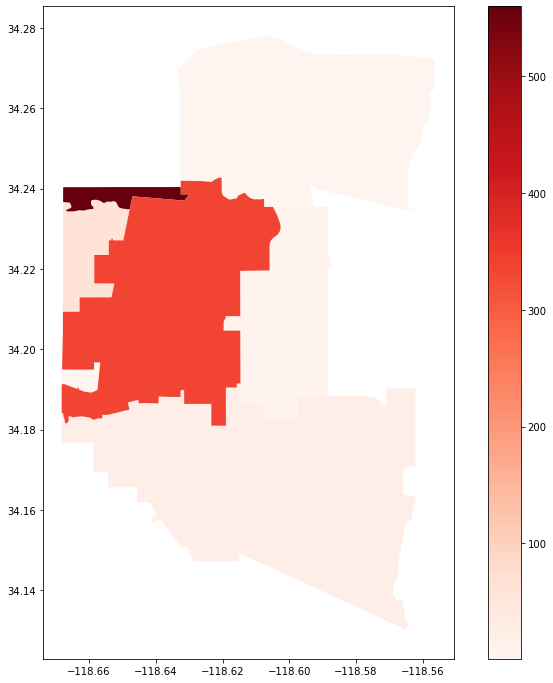

In [19]:
# choropleth map of vacant lots by community boundary
fig,ax = plt.subplots(figsize=(12,12))

comgdf.plot(ax=ax,column='vac_count',legend=True,cmap='Reds')

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


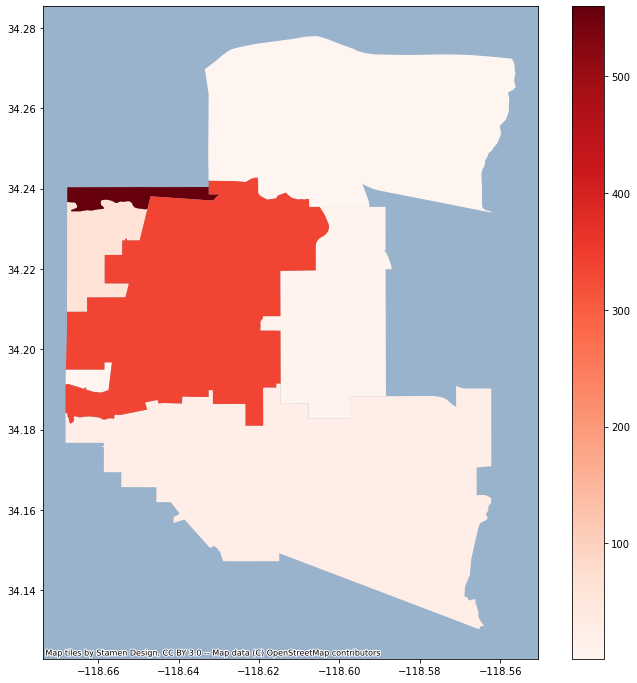

In [20]:
# choropleth map of arrests by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

comgdf.plot(ax=ax,column='vac_count',legend=True,cmap='Reds')

ctx.add_basemap(ax)

We are running into issues adding a basemap here. We are wondering if we need to do the (x_lim etc.) command that can help center. Lupe was also running into this issue when adding a basemap to specific census tracts.

## Using Plotly to graph

In [21]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

In [22]:
# connect to the data portal
client = Socrata("data.lacounty.gov", None)

# First 5000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("vcaw-zeg9", limit=5000, )

# Convert to pandas DataFrame
vacant_parcels = pd.DataFrame.from_records(results)

vacant_parcels.sample(2)

usecodedescchar1 roll_homeownersexemp situsunit recordingdate  \
3005      Residential                    0                20120731   
1263      Residential                    0                20020709   

     effectiveyearbuilt :@computed_region_gj26_y8x3 istaxableparcel  \
3005                  0                          69               Y   
1263                  0                          35               Y   

     roll_totlandimp roll_perspropexemp  \
3005           25614                  0   
1263          373573                  0   

                              parcelboundarydescription  ...  \
3005  TRACT NO 6170   LOT ON SE LINE OF MACFARLANE D...  ...   
1263  *LOT COM N 89¢53'25'' W 682.29 FT AND S 0¢23'4...  ...   

                                             location_1 bathrooms sqftmain  \
3005  {'latitude': '34.16255138', 'needs_recoding': ...         0        0   
1263  {'latitude': '34.15244387', 'needs_recoding': ...         0        0   

     situsdirection roll_realestateexemp   center_lat situszip yearbuilt  \
3005                                   0  34.16255138                  0   
1263                                   0  34.15244387                  0   

     propertylocation situszip5  
3005              NaN       NaN  
1263              NaN       NaN  

[2 rows x 55 columns]

Again, we are using API so it limits our data to 5000.

In [23]:
# Convert to pandas DataFrame
vacant_parcels = pd.DataFrame.from_records(vacant_parcels)

In [24]:
# how many rows and columns?
vacant_parcels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   usecodedescchar1             5000 non-null   object
 1   roll_homeownersexemp         5000 non-null   object
 2   situsunit                    5000 non-null   object
 3   recordingdate                5000 non-null   object
 4   effectiveyearbuilt           5000 non-null   object
 5   :@computed_region_gj26_y8x3  4995 non-null   object
 6   istaxableparcel              5000 non-null   object
 7   roll_totlandimp              5000 non-null   object
 8   roll_perspropexemp           5000 non-null   object
 9   parcelboundarydescription    5000 non-null   object
 10  roll_landbaseyear            5000 non-null   object
 11  situscity                    5000 non-null   object
 12  roll_impbaseyear             5000 non-null   object
 13  usetype                      5000

In [25]:
# what fields and datatypes?

vacant_parcels.dtypes

usecodedescchar1               object
roll_homeownersexemp           object
situsunit                      object
recordingdate                  object
effectiveyearbuilt             object
:@computed_region_gj26_y8x3    object
istaxableparcel                object
roll_totlandimp                object
roll_perspropexemp             object
parcelboundarydescription      object
roll_landbaseyear              object
situscity                      object
roll_impbaseyear               object
usetype                        object
usecodedescchar3               object
cluster                        object
adminregion                    object
roll_fixtureexemp              object
nettaxablevalue                object
taxratearea                    object
rowid                          object
:@computed_region_pft9_733t    object
:@computed_region_x8wy_s94z    object
roll_landvalue                 object
units                          object
taxratearea_city               object
situsfractio

In [26]:
vacant_parcels.columns

Index(['usecodedescchar1', 'roll_homeownersexemp', 'situsunit',
       'recordingdate', 'effectiveyearbuilt', ':@computed_region_gj26_y8x3',
       'istaxableparcel', 'roll_totlandimp', 'roll_perspropexemp',
       'parcelboundarydescription', 'roll_landbaseyear', 'situscity',
       'roll_impbaseyear', 'usetype', 'usecodedescchar3', 'cluster',
       'adminregion', 'roll_fixtureexemp', 'nettaxablevalue', 'taxratearea',
       'rowid', ':@computed_region_pft9_733t', ':@computed_region_x8wy_s94z',
       'roll_landvalue', 'units', 'taxratearea_city', 'situsfraction',
       'roll_impvalue', 'usecode', 'situsstreet', 'parcelclassification',
       'assessorid', 'roll_perspropvalue', 'usecodedescchar2', 'bedrooms',
       'roll_totalvalue', 'rollyear', 'ain', 'situshouseno',
       'roll_fixturevalue', 'usecodedescchar4', 'center_lon',
       ':@computed_region_cbw7_skn5', 'roll_totalexemption',
       'totbuildingdatalines', 'location_1', 'bathrooms', 'sqftmain',
       'situsdirection',

In [27]:
vacant_parcels.head()

usecodedescchar1 roll_homeownersexemp situsunit recordingdate  \
0      Residential                    0                20061005   
1      Residential                    0                19991216   
2      Residential                    0                20001114   
3      Residential                    0                19680828   
4      Residential                    0                19680828   

  effectiveyearbuilt :@computed_region_gj26_y8x3 istaxableparcel  \
0                  0                         441               Y   
1                  0                         441               N   
2                  0                         441               N   
3                  0                         441               Y   
4                  0                         441               Y   

  roll_totlandimp roll_perspropexemp parcelboundarydescription  ...  \
0          350000                  0            TR=25040 LOT A  ...   
1               0                  0           TR=20269 LOT 22  ...   
2               0                  0           TR=25303 LOT 28  ...   
3               0                  0   TRACT NO 25762 LOT    A  ...   
4               0                  0   TRACT NO 25762 LOT    B  ...   

                                          location_1 bathrooms sqftmain  \
0  {'latitude': '34.22637172', 'needs_recoding': ...         0        0   
1  {'latitude': '34.22434155', 'needs_recoding': ...         0        0   
2  {'latitude': '34.22463491', 'needs_recoding': ...         0        0   
3  {'latitude': '34.22088443', 'needs_recoding': ...         0        0   
4  {'latitude': '34.2204443', 'needs_recoding': F...         0        0   

  situsdirection roll_realestateexemp   center_lat    situszip yearbuilt  \
0                                   0  34.22637172                     0   
1                                   0  34.22434155  91304-2202         0   
2                                   0  34.22463491  91304-2209         0   
3                                   0  34.22088443                     0   
4                                   0  34.22044430                     0   

                         propertylocation situszip5  
0                                     NaN       NaN  
1  22345 MALDEN ST  LOS ANGELES CA  91304     91304  
2    22322 NAPA ST  LOS ANGELES CA  91304     91304  
3                                     NaN       NaN  
4                                     NaN       NaN  

[5 rows x 55 columns]

In [28]:
vac_par2 = vacant_parcels[['usecodedescchar1', 
                           'situscity', 
                           'usetype', 'cluster', 
                           'adminregion', 
                           'taxratearea',
                           'rowid', 
                           'taxratearea_city', 
                           'usecode', 
                           'parcelclassification', 
                           'center_lon', 
                           'center_lat', 
                           'situszip', 
                           'situszip5']]

### we shortned our data set and removed a few columns that we did not need

In [29]:
vac_par2.head()

usecodedescchar1       situscity usetype cluster adminregion taxratearea  \
0      Residential                     VAC   02121          02       00016   
1      Residential  LOS ANGELES CA     VAC   02121          02       00016   
2      Residential  LOS ANGELES CA     VAC   02121          02       00016   
3      Residential                     VAC   02121          02       00016   
4      Residential                     VAC   02121          02       00016   

            rowid taxratearea_city usecode  \
0  20152004015041      LOS ANGELES    010V   
1  20152004018900      LOS ANGELES    010V   
2  20152004018902      LOS ANGELES    010V   
3  20152005003037      LOS ANGELES    010V   
4  20152005003038      LOS ANGELES    010V   

                    parcelclassification     center_lon   center_lat  \
0                                         -118.61923487  34.22637172   
1  Public (non-taxable government-owned)  -118.61411005  34.22434155   
2  Public (non-taxable government-owned)  -118.61407872  34.22463491   
3                                         -118.63029295  34.22088443   
4                                         -118.62931438  34.22044430   

     situszip situszip5  
0                   NaN  
1  91304-2202     91304  
2  91304-2209     91304  
3                   NaN  
4                   NaN

In [30]:
# how many rows and columns?
vac_par2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   usecodedescchar1      5000 non-null   object
 1   situscity             5000 non-null   object
 2   usetype               5000 non-null   object
 3   cluster               5000 non-null   object
 4   adminregion           5000 non-null   object
 5   taxratearea           5000 non-null   object
 6   rowid                 5000 non-null   object
 7   taxratearea_city      5000 non-null   object
 8   usecode               5000 non-null   object
 9   parcelclassification  5000 non-null   object
 10  center_lon            4995 non-null   object
 11  center_lat            4995 non-null   object
 12  situszip              5000 non-null   object
 13  situszip5             340 non-null    object
dtypes: object(14)
memory usage: 547.0+ KB


### now, we are going to create a few graphs

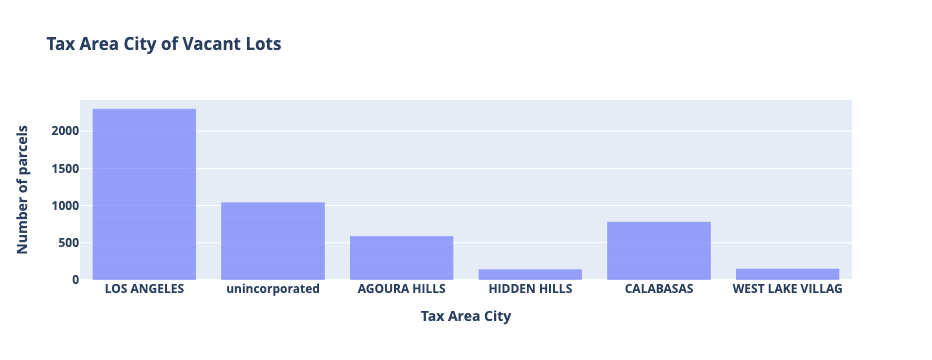

In [70]:
# add labels by providing a dict
fig = px.bar(
        vac_par2,
       x='taxratearea_city',
       title='Tax Area City of Vacant Lots',
        labels={
            'taxratearea_city':'Tax Area City',
            'count':'Number of parcels'
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

We grpahed the area of tax code that gave us a little more insight on the location of the vacant lot parcels.

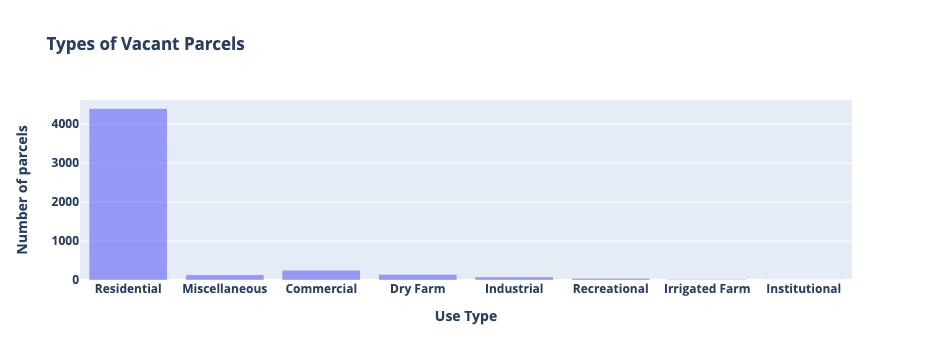

In [69]:
# add labels by providing a dict
fig = px.bar(
        vac_par2,
       x='usecodedescchar1',
       title='Types of Vacant Parcels ',
        labels={
            'usecodedescchar1':'Use Type',
            'count':'Number of parcels'
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

Now we get a better perspective of the assigned use of the vacant land. It is not surprising that it is for residential, specially given the location. Now we'll map it. 

In [32]:
# convert lat/lon's to floats
vac_par2['center_lat'] = vac_par2['center_lat'].astype(float)
vac_par2['center_lon'] = vac_par2['center_lon'].astype(float)
vac_par2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   usecodedescchar1      5000 non-null   object 
 1   situscity             5000 non-null   object 
 2   usetype               5000 non-null   object 
 3   cluster               5000 non-null   object 
 4   adminregion           5000 non-null   object 
 5   taxratearea           5000 non-null   object 
 6   rowid                 5000 non-null   object 
 7   taxratearea_city      5000 non-null   object 
 8   usecode               5000 non-null   object 
 9   parcelclassification  5000 non-null   object 
 10  center_lon            4995 non-null   float64
 11  center_lat            4995 non-null   float64
 12  situszip              5000 non-null   object 
 13  situszip5             340 non-null    object 
dtypes: float64(2), object(12)
memory usage: 547.0+ KB


/tmp/ipykernel_517/2216975513.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_517/2216975513.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



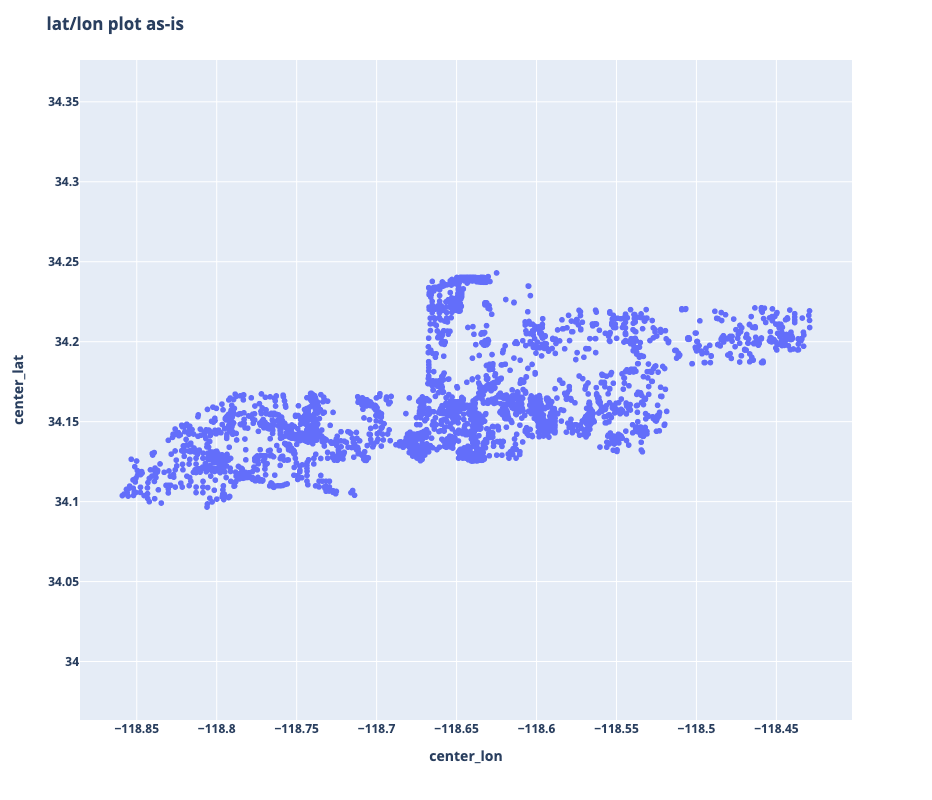

In [33]:
# plot it
fig = px.scatter(vac_par2,
           x='center_lon',
           y='center_lat'
)

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "lat/lon plot as-is"
)

# make it a square grid
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

Now, we see all the vacant land in this area. 

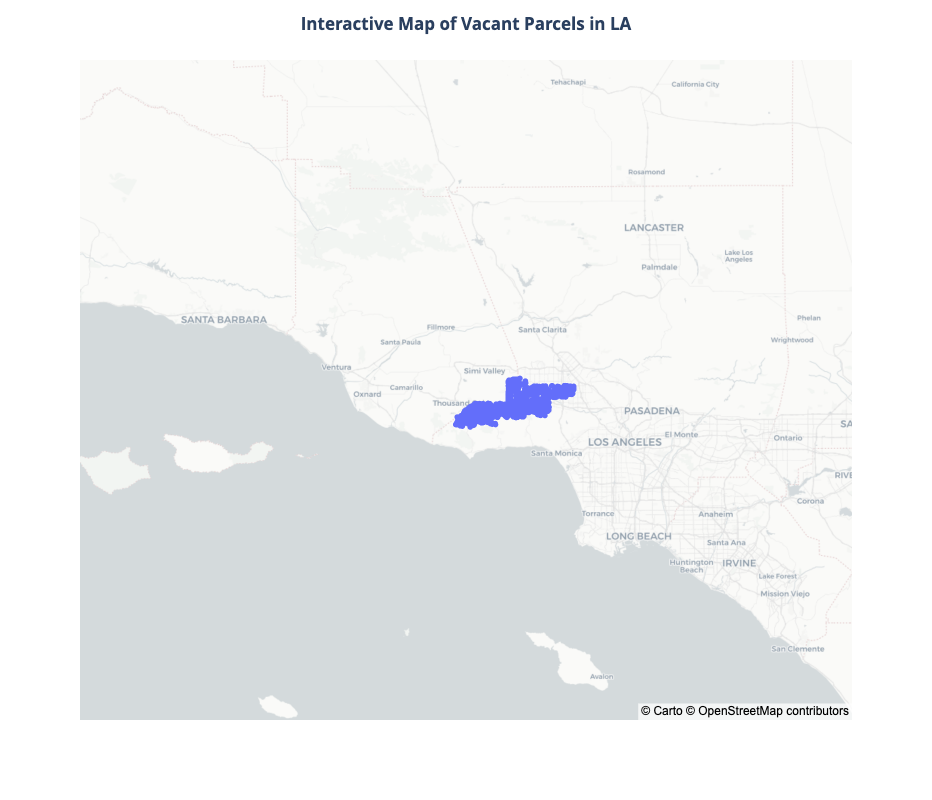

In [34]:
fig = px.scatter_mapbox(vac_par2,
                        lat='center_lat',
                        lon='center_lon',
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Map of Vacant Parcels in LA",
    title_x=0.5 # aligns title to center
)

fig.show()


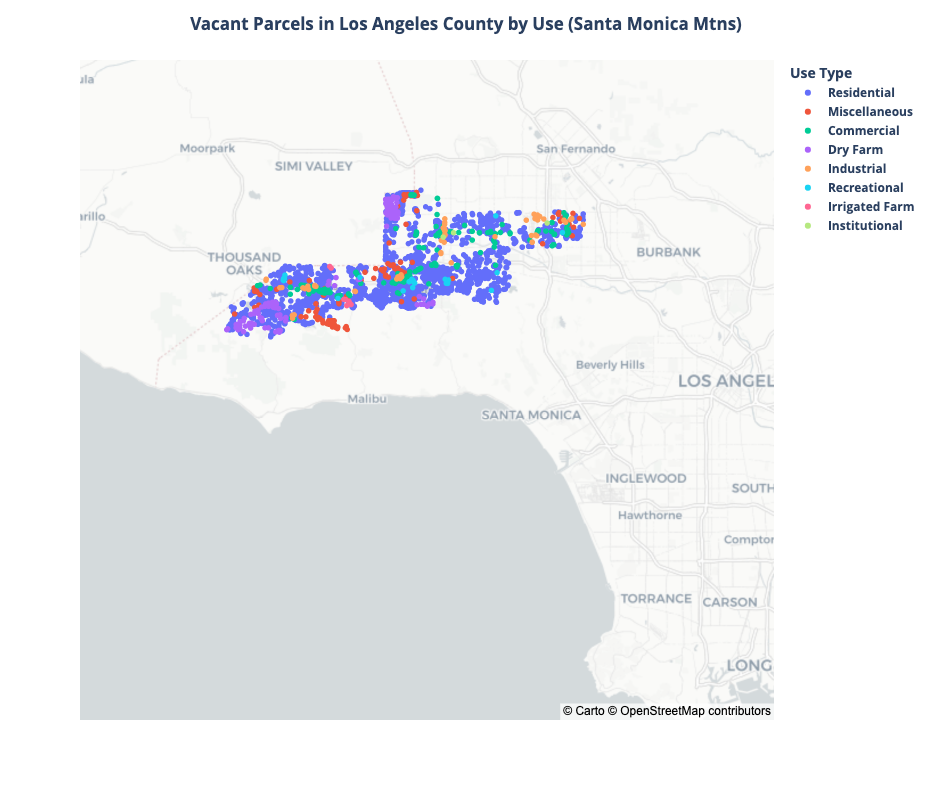

In [35]:
# what will se see next, perhaps type of parcels???
fig = px.scatter_mapbox(vac_par2, 
                        lat="center_lat", 
                        lon="center_lon", 
                        color="usecodedescchar1",
                        labels={'usecodedescchar1':'Use Type'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Vacant Parcels in Los Angeles County by Use (Santa Monica Mtns)",
    title_x=0.5 # aligns title to center
)


fig.show()

As our graph earlier showed, there are alot more residential vacant lot.

Below we will map the community boundaries.

In [36]:
comgdf_wm = comgdf.to_crs(epsg=3857)

<AxesSubplot:>

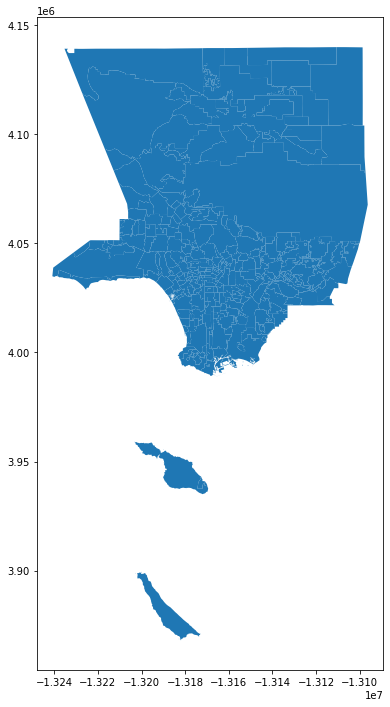

In [37]:
comgdf_wm.plot(figsize=(12,12))


<AxesSubplot:>

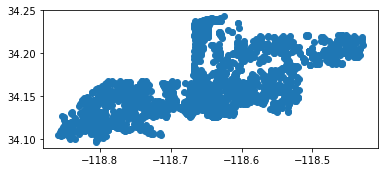

In [38]:
# convert vac_par2 to geodataframe
vacantgdf = gpd.GeoDataFrame(
    vac_par2, geometry=gpd.points_from_xy(vac_par2.center_lon, vac_par2.center_lat),crs=4326)

# check that it can be mapped
vacantgdf.plot()

In [39]:
# conduct a spatial join (i.e. assign each arrest to the neighborhood it is in)
vacant_by_community = gpd.sjoin(comgdf, vacantgdf) #Spatial join Points to polygons
vacant_by_community

community   source                     label city_type objectid  \
0          None      BOS      City of Agoura Hills      City        1   
0          None      BOS      City of Agoura Hills      City        1   
0          None      BOS      City of Agoura Hills      City        1   
0          None      BOS      City of Agoura Hills      City        1   
0          None      BOS      City of Agoura Hills      City        1   
..          ...      ...                       ...       ...      ...   
346  West Hills  LA City  Los Angeles - West Hills      City      174   
346  West Hills  LA City  Los Angeles - West Hills      City      174   
346  West Hills  LA City  Los Angeles - West Hills      City      174   
346  West Hills  LA City  Los Angeles - West Hills      City      174   
346  West Hills  LA City  Los Angeles - West Hills      City      174   

            lcity      shape_stlength        shape_starea  \
0    Agoura Hills  80374.083443170195  217940117.12695313   
0    Agoura Hills  80374.083443170195  217940117.12695313   
0    Agoura Hills  80374.083443170195  217940117.12695313   
0    Agoura Hills  80374.083443170195  217940117.12695313   
0    Agoura Hills  80374.083443170195  217940117.12695313   
..            ...                 ...                 ...   
346   Los Angeles  105989.43541216178  278714351.12011719   
346   Los Angeles  105989.43541216178  278714351.12011719   
346   Los Angeles  105989.43541216178  278714351.12011719   
346   Los Angeles  105989.43541216178  278714351.12011719   
346   Los Angeles  105989.43541216178  278714351.12011719   

                                              geometry  vac_count  ...  \
0    MULTIPOLYGON (((-118.72864 34.16793, -118.7286...        NaN  ...   
0    MULTIPOLYGON (((-118.72864 34.16793, -118.7286...        NaN  ...   
0    MULTIPOLYGON (((-118.72864 34.16793, -118.7286...        NaN  ...   
0    MULTIPOLYGON (((-118.72864 34.16793, -118.7286...        NaN  ...   
0    MULTIPOLYGON (((-118.72864 34.16793, -118.7286...        NaN  ...   
..                                                 ...        ...  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...      336.0  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...      336.0  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...      336.0  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...      336.0  ...   
346  MULTIPOLYGON (((-118.60490 34.23545, -118.6045...      336.0  ...   

     adminregion taxratearea           rowid taxratearea_city usecode  \
0             02       02387  20152063037900     AGOURA HILLS    010V   
0             02       02387  20152063037051     AGOURA HILLS    010V   
0             02       02387  20152063037052     AGOURA HILLS    010V   
0             02       13954  20152063037053     AGOURA HILLS    010V   
0             02       13954  20152063037060     AGOURA HILLS    010V   
..           ...         ...             ...              ...     ...   
346           02       00016  20152017020025      LOS ANGELES    010V   
346           02       00016  20152017020048      LOS ANGELES    010V   
346           02       00016  20152017016900      LOS ANGELES    880V   
346           02       00016  20152017009900      LOS ANGELES    880V   
346           02       02318  20152007002900      LOS ANGELES    880V   

                      parcelclassification  center_lon center_lat situszip  \
0    Public (non-taxable government-owned) -118.723996  34.126597            
0                                          -118.721031  34.126642            
0                                          -118.721885  34.127108            
0                                          -118.722917  34.127813            
0                                          -118.722988  34.128942            
..                                     ...         ...        ...      ...   
346                                        -118.651322  34.226881            
346   

In [40]:
# count the number of records per community
vacant_count = vacant_by_community.value_counts('community').reset_index(name='vacant_count')
vacant_count

community  vacant_count
0           Woodland Hills          1026
1               Lake Manor           560
2   Santa Monica Mountains           417
3               West Hills           336
4                 Van Nuys           322
5                  Tarzana           160
6                   Reseda           103
7                   Encino            83
8              Canoga Park            80
9              Lake Balboa            70
10         West Chatsworth            64
11                Winnetka            49
12           Panorama City            42
13            Reseda Ranch            26
14               Westhills             5
15              Chatsworth             1

In [41]:
# add the count to the neighborhoods
comgdf = comgdf.merge(vacant_count, how='left', on='community')

In [42]:
comgdf.sample(10)

community   source                             label  \
291             None      BOS                 City of Lancaster   
195  Sycamore Square  LA City     Los Angeles - Sycamore Square   
84   Stevenson Ranch      BOS  Unincorporated - Stevenson Ranch   
212  Athens-Westmont      BOS  Unincorporated - Athens-Westmont   
306   Jefferson Park  LA City      Los Angeles - Jefferson Park   
6          Hawthorne      BOS        Unincorporated - Hawthorne   
166             None      BOS             City of Hermosa Beach   
238     Elysian Park  LA City        Los Angeles - Elysian Park   
200             None      BOS          City of Santa Fe Springs   
319         Longwood  LA City            Los Angeles - Longwood   

          city_type objectid             lcity      shape_stlength  \
291            City       43         Lancaster  678436.66490331059   
195            City      151       Los Angeles  5944.4884628245654   
84   Unincorporated      318    Unincorporated  179210.44333945669   
212  Unincorporated      228    Unincorporated  55016.820673408765   
306            City      102       Los Angeles  14198.764185855904   
6    Unincorporated      263    Unincorporated  8004.2999779529582   
166            City       31     Hermosa Beach  30499.829389676379   
238            City       79       Los Angeles  39718.047520712687   
200            City      207  Santa Fe Springs  157552.59086867765   
319            City      112       Los Angeles  13147.195584764413   

           shape_starea                                           geometry  \
291  2635029511.7763672  MULTIPOLYGON (((-118.23718 34.76209, -118.2365...   
195  1831246.9970703125  MULTIPOLYGON (((-118.34127 34.06046, -118.3419...   
84   1192509035.9580078  MULTIPOLYGON (((-118.55349 34.35808, -118.5531...   
212  88748915.741210938  MULTIPOLYGON (((-118.29160 33.95949, -118.2916...   
306   12565603.55859375  MULTIPOLYGON (((-118.31766 34.02965, -118.3176...   
6     3321496.177734375  MULTIPOLYGON (((-118.32651 33.91282, -118.3265...   
166  40487119.004882813  MULTIPOLYGON (((-118.39144 33.87287, -118.3914...   
238  48791230.741210938  MULTIPOLYGON (((-118.22788 34.08316, -118.2276...   
200  247463254.18554688  MULTIPOLYGON (((-118.05492 33.96822, -118.0549...   
319  6570202.8525390625  MULTIPOLYGON (((-118.33980 34.03984, -118.3387...   

     vac_count  vacant_count  
291        NaN           NaN  
195        NaN           NaN  
84         NaN           NaN  
212        NaN           NaN  
306        NaN           NaN  
6          NaN           NaN  
166        NaN           NaN  
238        NaN           NaN  
200        NaN           NaN  
319        NaN           NaN

<AxesSubplot:>

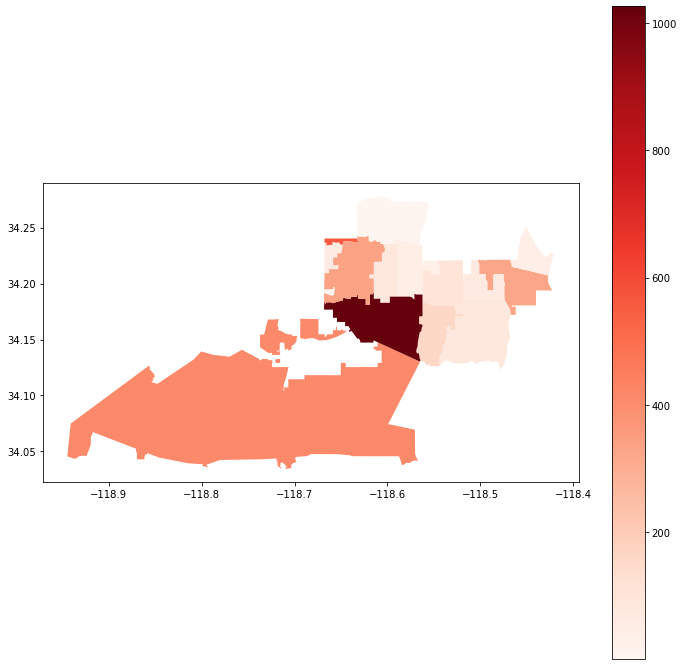

In [44]:
# choropleth map of vacant lot by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

comgdf.plot(ax=ax,column='vacant_count',legend=True,cmap='Reds')

In [43]:
from keplergl import KeplerGl

# choropleth map of vacant lots by neighborhoods
vacantmap2=KeplerGl(height=500,data={'Vacant Parcels LA':vac_par2})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


ValueError: Can't clean for JSON: <shapely.geometry.point.Point object at 0x7fb370766d30>

In [45]:
# show me distinct value of charges
vac_par2.grp_description.unique().tolist()

AttributeError: 'DataFrame' object has no attribute 'grp_description'

### Narrowing our scope: El Sereno and Lincoln Heights

In [61]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [62]:
comgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [63]:
comgdf_new = comgdf.loc[[116,152]]

In [64]:
comgdf_new.head()

community   source                          label city_type  \
116        El Sereno  LA City        Los Angeles - El Sereno      City   
152  Lincoln Heights  LA City  Los Angeles - Lincoln Heights      City   

    objectid        lcity      shape_stlength        shape_starea  \
116       78  Los Angeles  57287.733092284157  109050969.50683594   
152      108  Los Angeles  60756.009942239587  91056715.407226563   

                                              geometry  vac_count  \
116  MULTIPOLYGON (((-118.15536 34.09867, -118.1553...        NaN   
152  MULTIPOLYGON (((-118.19006 34.09722, -118.1903...        NaN   

     vacant_count  
116           NaN  
152           NaN

<AxesSubplot:>

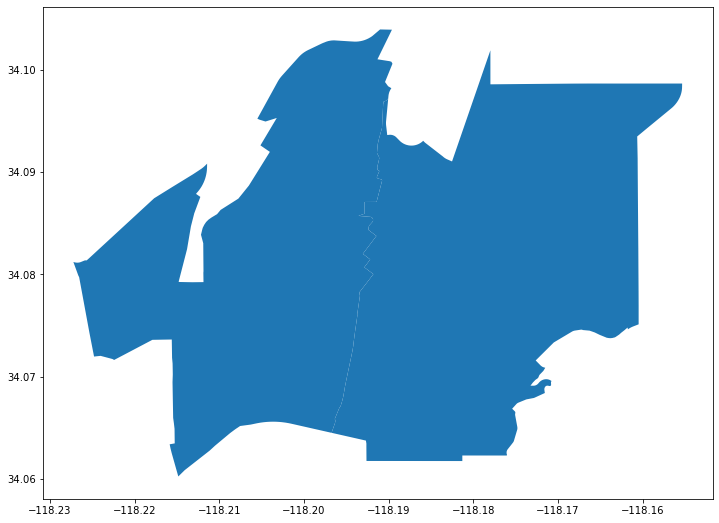

In [65]:
comgdf_new.plot(figsize=(12,12))

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning:

The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 18).



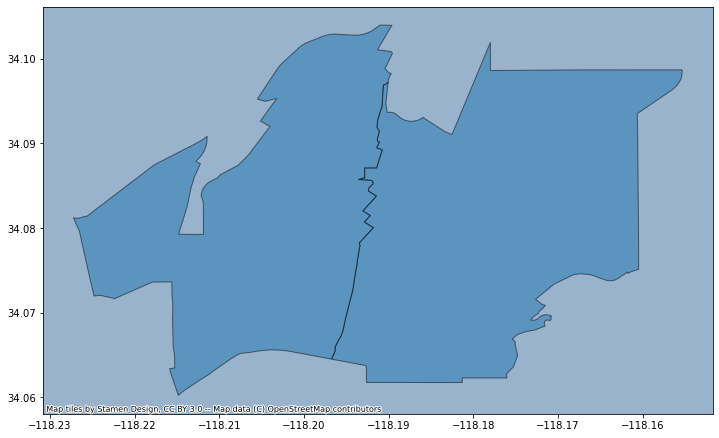

In [66]:
ax = comgdf_new.plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax) 

Again, we are running into issues adding a map here. Lupe was able to do it on a separete noteback with Census tracts. This is something we should revist again.

### Lupe Renteria Salome
worked on data exploration of community boundaries map and coding to zoom into El Sereno and Lincoln heights.

### Mel Liu
workeds on data exploration of vacant parcel dataframe, and imported using API.

Both worked collaboratively on the code in this midterm notebook on the spatial join and interactive and static maps, as well as the graph.

Next step is to code vacant parcel counts for Lincoln Heights and Boyle Heights